<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_4_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.518496,71.747022,32.252077,15501.005095,15653.522691,1304.210298,14349.312393
1,0.0,1.0,74.834233,62.873248,35.321902,8698.882087,8881.911470,-4728.398810,13610.310281
2,0.0,2.0,69.737132,53.120989,46.685037,-8158.775949,-7979.232791,-950.014827,-7029.217964
3,0.0,3.0,74.066212,67.005046,70.405085,-18703.582554,-18482.106212,4975.601218,-23457.707430
4,0.0,4.0,25.663668,49.477212,33.576313,24036.714366,24155.431559,3509.293313,20646.138246
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.305717,70.832641,69.794418,1777.862977,2009.795753,2314.392800,-304.597047
19996,999.0,16.0,47.531950,64.221145,64.716507,-3515.840128,-3329.370526,10721.259398,-14050.629924
19997,999.0,17.0,29.217004,75.675308,77.371074,17016.418709,17208.682095,23189.987938,-5981.305843
19998,999.0,18.0,39.943144,47.957042,51.832812,-733.518241,-583.785243,5698.392325,-6282.177568


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.518496,71.747022,32.252077,15501.005095,15653.522691,1304.210298,14349.312393
1,0.0,1.0,74.834233,62.873248,35.321902,8698.882087,8881.911470,-4728.398810,13610.310281
2,0.0,2.0,69.737132,53.120989,46.685037,-8158.775949,-7979.232791,-950.014827,-7029.217964
3,0.0,3.0,74.066212,67.005046,70.405085,-18703.582554,-18482.106212,4975.601218,-23457.707430
4,0.0,4.0,25.663668,49.477212,33.576313,24036.714366,24155.431559,3509.293313,20646.138246
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.305717,70.832641,69.794418,1777.862977,2009.795753,2314.392800,-304.597047
19996,999.0,16.0,47.531950,64.221145,64.716507,-3515.840128,-3329.370526,10721.259398,-14050.629924
19997,999.0,17.0,29.217004,75.675308,77.371074,17016.418709,17208.682095,23189.987938,-5981.305843
19998,999.0,18.0,39.943144,47.957042,51.832812,-733.518241,-583.785243,5698.392325,-6282.177568


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    38.518496  71.747022  ...   1304.210298  14349.312393
      1.0    74.834233  62.873248  ...  -4728.398810  13610.310281
      2.0    69.737132  53.120989  ...   -950.014827  -7029.217964
      3.0    74.066212  67.005046  ...   4975.601218 -23457.707430
      4.0    25.663668  49.477212  ...   3509.293313  20646.138246
...                ...        ...  ...           ...           ...
999.0 15.0   81.305717  70.832641  ...   2314.392800   -304.597047
      16.0   47.531950  64.221145  ...  10721.259398 -14050.629924
      17.0   29.217004  75.675308  ...  23189.987938  -5981.305843
      18.0   39.943144  47.957042  ...   5698.392325  -6282.177568
      19.0   87.144529  31.225904  ... -11645.504480   7297.476883

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    38.518496  71.747022  ...   1304.210298  14349.312393
      1.0    74.834233  62.873248  ...  -4728.398810  13610.310281
      2.0    69.737132  53.120989  ...   -950.014827  -7029.217964
      3.0    74.066212  67.005046  ...   4975.601218 -23457.707430
      4.0    25.663668  49.477212  ...   3509.293313  20646.138246
...                ...        ...  ...           ...           ...
999.0 15.0   81.305717  70.832641  ...   2314.392800   -304.597047
      16.0   47.531950  64.221145  ...  10721.259398 -14050.629924
      17.0   29.217004  75.675308  ...  23189.987938  -5981.305843
      18.0   39.943144  47.957042  ...   5698.392325  -6282.177568
      19.0   87.144529  31.225904  ... -11645.504480   7297.476883

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.518496,71.747022,32.252077,15501.005095,15653.522691,1304.210298,14349.312393
1,0.0,1.0,74.834233,62.873248,35.321902,8698.882087,8881.911470,-4728.398810,13610.310281
2,0.0,2.0,69.737132,53.120989,46.685037,-8158.775949,-7979.232791,-950.014827,-7029.217964
3,0.0,3.0,74.066212,67.005046,70.405085,-18703.582554,-18482.106212,4975.601218,-23457.707430
4,0.0,4.0,25.663668,49.477212,33.576313,24036.714366,24155.431559,3509.293313,20646.138246
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,81.305717,70.832641,69.794418,1777.862977,2009.795753,2314.392800,-304.597047
19996,999.0,16.0,47.531950,64.221145,64.716507,-3515.840128,-3329.370526,10721.259398,-14050.629924
19997,999.0,17.0,29.217004,75.675308,77.371074,17016.418709,17208.682095,23189.987938,-5981.305843
19998,999.0,18.0,39.943144,47.957042,51.832812,-733.518241,-583.785243,5698.392325,-6282.177568


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    38.518496  71.747022  ...   1304.210298  14349.312393
      1.0    74.834233  62.873248  ...  -4728.398810  13610.310281
      2.0    69.737132  53.120989  ...   -950.014827  -7029.217964
      3.0    74.066212  67.005046  ...   4975.601218 -23457.707430
      4.0    25.663668  49.477212  ...   3509.293313  20646.138246
...                ...        ...  ...           ...           ...
999.0 15.0   81.305717  70.832641  ...   2314.392800   -304.597047
      16.0   47.531950  64.221145  ...  10721.259398 -14050.629924
      17.0   29.217004  75.675308  ...  23189.987938  -5981.305843
      18.0   39.943144  47.957042  ...   5698.392325  -6282.177568
      19.0   87.144529  31.225904  ... -11645.504480   7297.476883

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

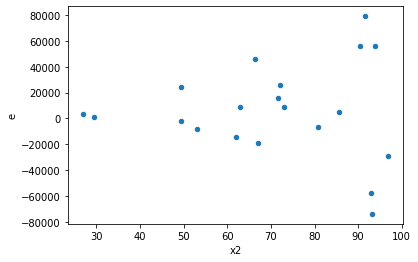

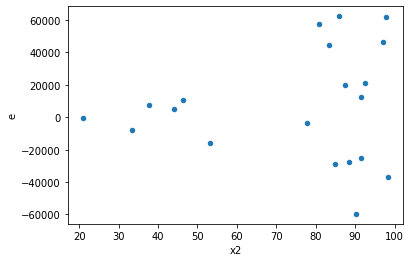

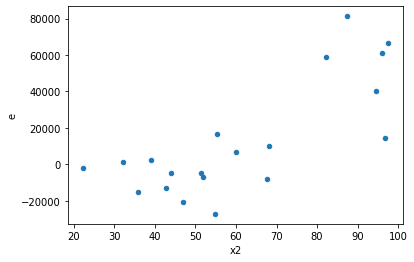

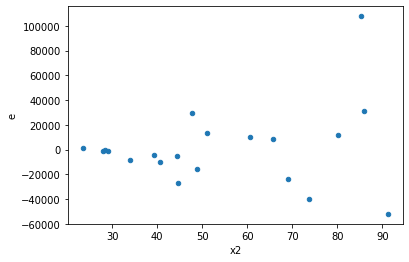

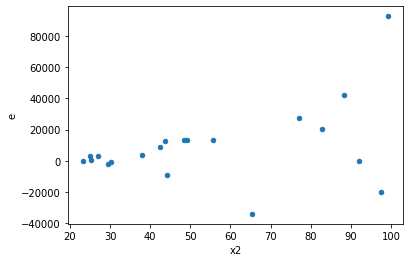

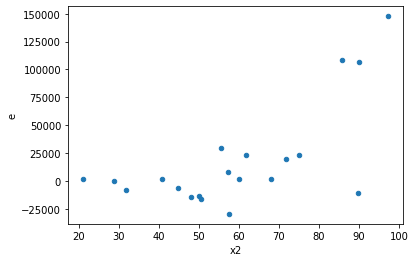

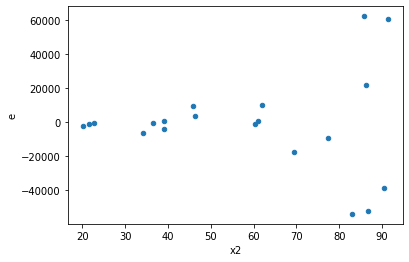

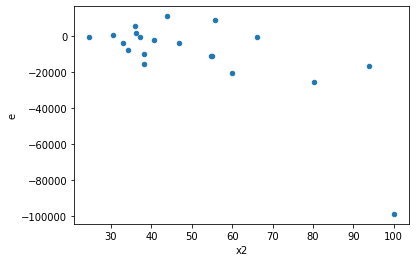

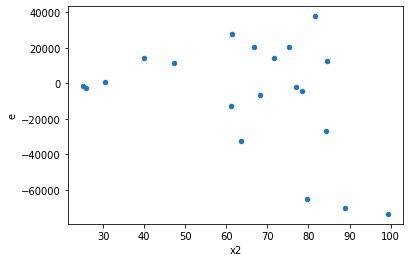

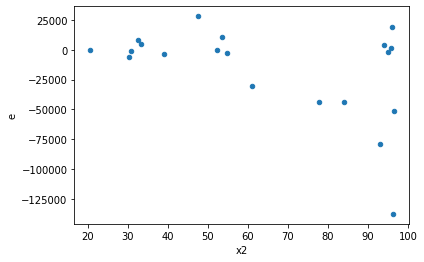

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,17389386596.274437,868880521.6097827,4347346649.068609,217220130.40244567,20.013553260529957,0.005096468001446031,0.997451765999277,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,5393211028.12711,1834870146.7375507,1348302757.0317774,458717536.6843877,2.9392875772252256,0.261732346279282,0.869133826860359,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,2374157335.32274,400459391.3183641,593539333.830685,100114847.82959102,5.92858448769726,0.07306836857822807,0.963465815710886,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,11611954672.213036,42050849.02850846,2902988668.053259,10512712.257127116,276.1407900311522,8.464409107844517e-06,0.9999957677954461,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,8524311446.273076,7435757.683839468,2131077861.568269,1858939.420959867,1146.3944642520319,2.434116117555618e-07,0.9999998782941941,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,5348274446.227606,101311510.09336749,1337068611.5569015,25327877.52334187,52.790393128073006,0.0005018352604959642,0.999749082369752,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,14098958513.628428,64102505.36215892,3524739628.407107,16025626.34053973,219.94395435831663,1.4900959327768248e-05,0.9999925495203361,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,1133049053.9934602,119841917.69712365,283262263.49836504,29960479.42428091,9.454530399430139,0.02765305731590373,0.9861734713420481,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,7823975631.223134,2205580545.3581843,1955993907.8057835,551395136.3395461,3.5473542998415084,0.19090302527993064,0.9045484873600347,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,17389386596.274437,868880521.6097827,4347346649.068609,217220130.40244567,20.013553260529957,0.005096468001446031,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,5393211028.12711,1834870146.7375507,1348302757.0317774,458717536.6843877,2.9392875772252256,0.261732346279282,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,2374157335.32274,400459391.3183641,593539333.830685,100114847.82959102,5.92858448769726,0.07306836857822807,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,11611954672.213036,42050849.02850846,2902988668.053259,10512712.257127116,276.1407900311522,8.464409107844517e-06,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,8524311446.273076,7435757.683839468,2131077861.568269,1858939.420959867,1146.3944642520319,2.434116117555618e-07,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,5348274446.227606,101311510.09336749,1337068611.5569015,25327877.52334187,52.790393128073006,0.0005018352604959642,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,14098958513.628428,64102505.36215892,3524739628.407107,16025626.34053973,219.94395435831663,1.4900959327768248e-05,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,1133049053.9934602,119841917.69712365,283262263.49836504,29960479.42428091,9.454530399430139,0.02765305731590373,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,7823975631.223134,2205580545.3581843,1955993907.8057835,551395136.3395461,3.5473542998415084,0.19090302527993064,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    874
Reject005=1 : Homoscedasticity      126
Name: Result_test, dtype: int64